# Day 5
2, 100

### Import modules

In [1]:
%matplotlib inline
from __future__ import division
import sys
import os
os.environ['MKL_THREADING_LAYER']='GNU'
sys.path.append('../')
from Modules.Basics import *
from Modules.Class_Basics import *

/home/giles/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
Using Theano backend.
/home/giles/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Options

In [8]:
classTrainFeatures = ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_pt', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt', 'PRI_tau_px', 'PRI_tau_py', 'PRI_tau_pz', 'PRI_lep_px', 'PRI_lep_pz', 'PRI_jet_leading_px', 'PRI_jet_leading_py', 'PRI_jet_leading_pz', 'PRI_jet_subleading_px', 'PRI_jet_subleading_py', 'PRI_jet_subleading_pz', 'PRI_met_px', 'PRI_met_py']
inputPipe, outputPipe = getPreProcPipes(normIn=True)
classModel = 'modelSwish-5-100'
varSet = "basic_rot_features"

nSplits = 10
ensembleSize = 10
ensembleMode = 'loss'

maxEpochs = 200
compileArgs = {'loss':'binary_crossentropy', 'optimizer':'adam', 'depth':6, 'width':50}
trainParams = {'epochs' : 1, 'batch_size' : 256, 'verbose' : 0}
modelParams = {'version':classModel, 'nIn':len(classTrainFeatures), 'compileArgs':compileArgs}

print "\nTraining on", len(classTrainFeatures), "features:", [var for var in classTrainFeatures]


Training on 30 features: ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_pt', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt', 'PRI_tau_px', 'PRI_tau_py', 'PRI_tau_pz', 'PRI_lep_px', 'PRI_lep_pz', 'PRI_jet_leading_px', 'PRI_jet_leading_py', 'PRI_jet_leading_pz', 'PRI_jet_subleading_px', 'PRI_jet_subleading_py', 'PRI_jet_subleading_pz', 'PRI_met_px', 'PRI_met_py']


## Import data

In [9]:
trainData = h5py.File(dirLoc + 'train.hdf5', "r+")
valData = h5py.File(dirLoc + 'val.hdf5', "r+")

## Determine LR

2 classes found, running in binary mode


______________________________________
Training finished
Cross-validation took 4.176s 


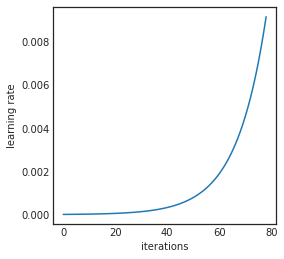

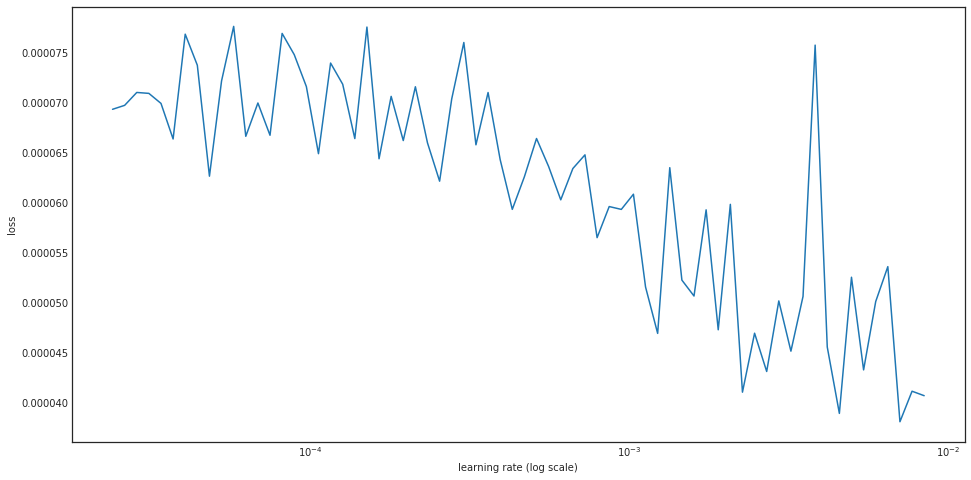

______________________________________



In [10]:
lrFinder = batchLRFindClassifier(trainData, nSplits, getClassifier, modelParams, trainParams, lrBounds=[1e-5,1e-2], trainOnWeights=True, verbose=0)

In [11]:
compileArgs['lr'] = 5e-3

## Train classifier

Using cosine annealing
Training using weights
Running fold 1 / 10
2 classes found, running in binary mode

1 New best found: 3.83394251325e-05
2 New best found: 3.57775848932e-05
3 New best found: 3.43249960376e-05
6 New best found: 3.33537046552e-05
7 New best found: 3.32446884652e-05
12 New best found: 3.28721078574e-05
14 New best found: 3.27608267797e-05
15 New best found: 3.26992285593e-05
25 New best found: 3.26766713702e-05
27 New best found: 3.25585826087e-05
28 New best found: 3.24951785464e-05
29 New best found: 3.2391200203e-05
30 New best found: 3.236293448e-05
31 New best found: 3.23622639325e-05
56 New best found: 3.23174373354e-05
57 New best found: 3.2276783138e-05
58 New best found: 3.22526936407e-05
59 New best found: 3.22221372192e-05
60 New best found: 3.22101432126e-05
61 New best found: 3.22041689613e-05
62 New best found: 3.21923186147e-05
Early stopping after 162 epochs
Score is: {'loss': 3.2192318614745765e-05, 'AUC': 0.10205015945759921, 'wAUC': 0.065723273003

59 New best found: 3.29607545907e-05
Early stopping after 159 epochs
Score is: {'loss': 3.2960754590700739e-05, 'AUC': 0.10446558695801023, 'wAUC': 0.067743716405406995}
Fold took 106.995s

Running fold 10 / 10
1 New best found: 3.92306340163e-05
2 New best found: 3.56862775878e-05
3 New best found: 3.44637398582e-05
4 New best found: 3.41280064089e-05
6 New best found: 3.33287405378e-05
7 New best found: 3.30730400707e-05
12 New best found: 3.28325951246e-05
13 New best found: 3.25878822794e-05
14 New best found: 3.25328284136e-05
26 New best found: 3.24029919043e-05
27 New best found: 3.23137807755e-05
29 New best found: 3.21955618017e-05
30 New best found: 3.21907005246e-05
31 New best found: 3.21866580476e-05
53 New best found: 3.21818573689e-05
55 New best found: 3.21725802892e-05
56 New best found: 3.21493813467e-05
57 New best found: 3.21369677788e-05
58 New best found: 3.21242081957e-05
59 New best found: 3.20844857854e-05
61 New best found: 3.20670546633e-05
Early stopping aft

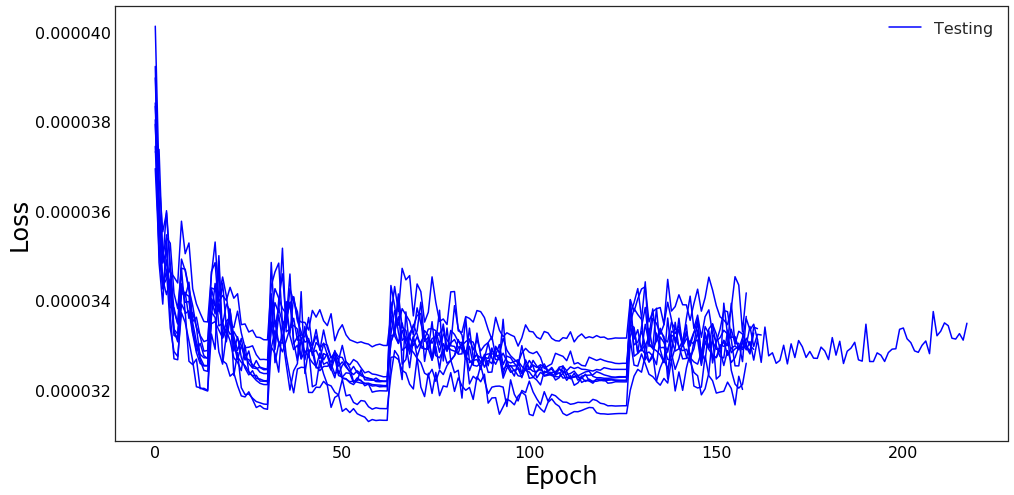

Mean wAUC = 0.0645 +- 0.0005
______________________________________



In [12]:
results, histories = batchTrainClassifier(trainData, nSplits, getClassifier, modelParams, trainParams, patience=100, cosAnnealMult=2, trainOnWeights=True, maxEpochs=maxEpochs, verbose=1)

## Construct ensemble

In [13]:
with open('train_weights/resultsFile.pkl', 'r') as fin:   
    results = pickle.load(fin)

In [14]:
ensemble, weights = assembleEnsemble(results, ensembleSize, ensembleMode, compileArgs)

Choosing ensemble by loss
Model 0 is 4 with loss = 3.12902836449e-05
Model 1 is 7 with loss = 3.15661678322e-05
Model 2 is 5 with loss = 3.19471839219e-05
Model 3 is 9 with loss = 3.20670546633e-05
Model 4 is 6 with loss = 3.20943656421e-05
Model 5 is 2 with loss = 3.21480107124e-05
Model 6 is 1 with loss = 3.2179465287e-05
Model 7 is 0 with loss = 3.21923186147e-05
Model 8 is 3 with loss = 3.22908118484e-05
Model 9 is 8 with loss = 3.29607545907e-05


## Response on development data

In [15]:
batchEnsemblePredict(ensemble, weights, trainData, ensembleSize=10, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.000183322728738s per sample

Predicting batch 2 out of 10
Prediction took 0.000133150250046s per sample

Predicting batch 3 out of 10
Prediction took 0.000133475675135s per sample

Predicting batch 4 out of 10
Prediction took 0.000128675842285s per sample

Predicting batch 5 out of 10
Prediction took 0.000130909097195s per sample

Predicting batch 6 out of 10
Prediction took 0.000130417394638s per sample

Predicting batch 7 out of 10
Prediction took 0.000131163907051s per sample

Predicting batch 8 out of 10
Prediction took 0.000136634231633s per sample

Predicting batch 9 out of 10
Prediction took 0.000132498130053s per sample

Predicting batch 10 out of 10
Prediction took 0.000132878438623s per sample



In [16]:
print 'Training ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', trainData), getFeature('pred', trainData)),
                                                            roc_auc_score(getFeature('targets', trainData), getFeature('pred', trainData), sample_weight=getFeature('weights', trainData)))

Training ROC AUC: unweighted 0.903455046865, weighted 0.939601687293


## Response on val data

In [17]:
batchEnsemblePredict(ensemble, weights, valData, ensembleSize=10, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.00013798956871s per sample

Predicting batch 2 out of 10
Prediction took 0.000132700204849s per sample

Predicting batch 3 out of 10
Prediction took 0.000128919410706s per sample

Predicting batch 4 out of 10
Prediction took 0.00013365778923s per sample

Predicting batch 5 out of 10
Prediction took 0.000131637239456s per sample

Predicting batch 6 out of 10
Prediction took 0.000132459354401s per sample

Predicting batch 7 out of 10
Prediction took 0.000129360961914s per sample

Predicting batch 8 out of 10
Prediction took 0.000130373191833s per sample

Predicting batch 9 out of 10
Prediction took 0.000132313203812s per sample

Predicting batch 10 out of 10
Prediction took 0.000130831432343s per sample



In [18]:
print 'Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', valData), getFeature('pred', valData)),
                                                           roc_auc_score(getFeature('targets', valData), getFeature('pred', valData), sample_weight=getFeature('weights', valData)))

Testing ROC AUC: unweighted 0.901008773755, weighted 0.934657631192


## Evaluation

### Import in dataframe

In [19]:
valframe = convertToDF(valData)

50000 candidates loaded


In [20]:
sigVal = (valframe.gen_target == 1)
bkgVal = (valframe.gen_target == 0)

### MVA distributions

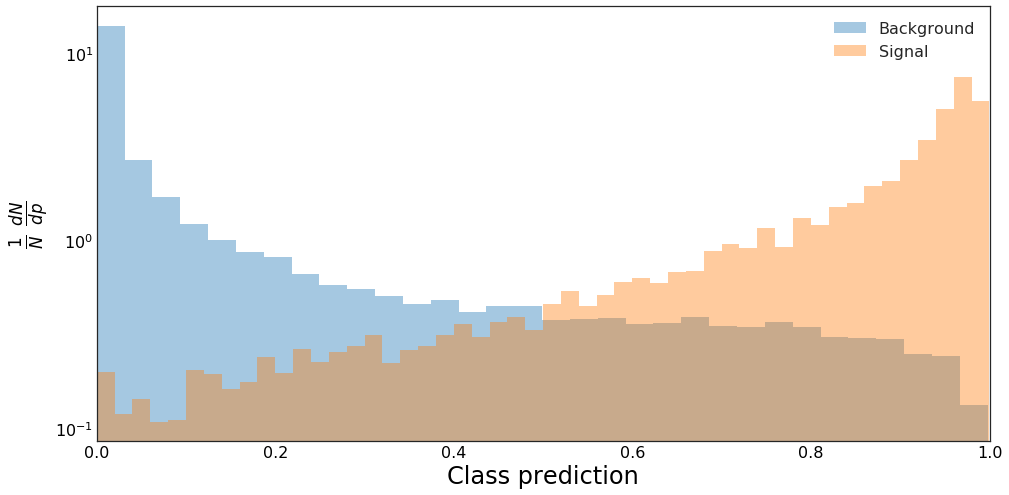

In [21]:
getClassPredPlot([valframe[bkgVal], valframe[sigVal]], weightName='gen_weight')

In [23]:
valframe['ams'] = amsScan(valframe)[0]

[0.93797194957733154, 1.6897469171332977]


In [22]:
bests = foldAMSScan(valframe, 10)

[0.93032962083816528, 1.7871994273072274]
Fold 0, best AMS 1.78719942731 at cut of 0.930329620838. Total weights Signal:Bkg. 13.3146686554:8200.81933594


../Modules/Basics.py:61: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  np.sum(inData.iloc[test][inData.gen_target == 1]['gen_weight']),
../Modules/Basics.py:62: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  np.sum(inData.iloc[test][inData.gen_target == 0]['gen_weight']))


[0.97456657886505127, 1.8259063369331672]
Fold 1, best AMS 1.82590633693 at cut of 0.974566578865. Total weights Signal:Bkg. 13.5202617645:8231.23242188
[0.91982990503311157, 1.6732104539175474]
Fold 2, best AMS 1.67321045392 at cut of 0.919829905033. Total weights Signal:Bkg. 13.8539829254:8369.74707031
[0.98500847816467285, 2.071736845218252]
Fold 3, best AMS 2.07173684522 at cut of 0.985008478165. Total weights Signal:Bkg. 14.4511003494:8200.21679688
[0.98514032363891602, 2.340668001859617]
Fold 4, best AMS 2.34066800186 at cut of 0.985140323639. Total weights Signal:Bkg. 13.9988565445:8185.86083984
[0.969338059425354, 2.0349869789661823]
Fold 5, best AMS 2.03498697897 at cut of 0.969338059425. Total weights Signal:Bkg. 13.798997879:8114.93310547
[0.93636584281921387, 1.6795834179235556]
Fold 6, best AMS 1.67958341792 at cut of 0.936365842819. Total weights Signal:Bkg. 13.635602951:8103.15527344
[0.98217481374740601, 2.946118841506385]
Fold 7, best AMS 2.94611884151 at cut of 0.9821

In [25]:
def scoreTest(ensemble, weights):
    testData = h5py.File(dirLoc + 'testing.hdf5', "r+")
    batchEnsemblePredict(ensemble, weights, testData, ensembleSize=10, verbose=1)

In [26]:
scoreTest(ensemble, weights)

Predicting batch 1 out of 10
Prediction took 0.000132894069498s per sample

Predicting batch 2 out of 10
Prediction took 0.000133294036172s per sample

Predicting batch 3 out of 10
Prediction took 0.000134814327413s per sample

Predicting batch 4 out of 10
Prediction took 0.000132951563055s per sample

Predicting batch 5 out of 10
Prediction took 0.000134903274883s per sample

Predicting batch 6 out of 10
Prediction took 0.00013182812604s per sample

Predicting batch 7 out of 10
Prediction took 0.00013323321776s per sample

Predicting batch 8 out of 10
Prediction took 0.000133752272346s per sample

Predicting batch 9 out of 10
Prediction took 0.000132376688177s per sample

Predicting batch 10 out of 10
Prediction took 0.000133113215186s per sample



In [ ]:
saveTest(0.959698124617, 'Day_5')

In [ ]:
!kaggle competitions submit -c higgs-boson -f ../Data/Day_5_test.csv -m"6-50"